Notebook créé le 04/10/19 par Tupac (tupac@metriq.io)

## Import

In [1]:
# Imports
import numpy as np
import logging
from os import listdir
from os.path import isfile, join
from functools import reduce
import json
from io import StringIO, BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
import datetime as dt
import pandas as pd

# Constituion du dataframe général

In [4]:
# Constitution du dataframe questions_df
data = []
dossier_questions = 'questionsXV'
for i, file in enumerate(listdir(dossier_questions)):
    try:
        with open(dossier_questions+'/'+file, 'r') as f:
            # Code de Xavier Tannier pour ouvrir les fichiers avec le bon encodage
            content = f.read()
            io = StringIO(content)
            json_data = json.load(io)

            # print(json.dumps(json_data, indent=4, sort_keys=True))

            question = json_data["question"]["textesQuestion"]["texteQuestion"]["texte"]
            groupe_auteur = json_data["question"]["auteur"]["groupe"]["abrege"]
            rubrique = json_data["question"]["indexationAN"]["rubrique"]
            try:
                date_q = json_data["question"]["textesQuestion"]["texteQuestion"]["infoJO"]["dateJO"]
                date_question = dt.datetime.strptime(date_q, "%d/%m/%Y")
            except:
                print('pb q'  + file)
            if json_data["question"].get("textesReponse"):
                # Certaines questions n'ont pas encore de réponse... 
                try:
                    date_r = json_data["question"]["textesReponse"]["texteReponse"]["infoJO"]["dateJO"]
                    if len(date_r) > 0:
                        date_reponse = dt.datetime.strptime(date_r, "%d/%m/%Y")
                    else:
                         date_reponse = None
                except:
                    print(file) 

            else:
                date_reponse = None
            ministere_adresse = json_data["question"]["minInt"]["developpe"]

            # On ajoute les colonnes qui nous intéressent dans une liste de dictionnaire : data
            data.append({
                "question": question,
                "groupe_auteur": groupe_auteur,
                "date_question": date_question,
                "date_reponse": date_reponse,
                "ministere_adresse": ministere_adresse,
                "rubrique": rubrique
            })
    except:
        pass
        
questions_df = pd.DataFrame(data)

QANR5L15QE16308.json
QANR5L15QE13216.json
QANR5L15QE10851.json
QANR5L15QE16058.json
QANR5L15QE6842.json
QANR5L15QE1478.json
QANR5L15QE3249.json
QANR5L15QE9823.json


In [9]:
# Transformation des dates
questions_df['date_question'] = pd.to_datetime(questions_df['date_question'])
questions_df['date_reponse'] = pd.to_datetime(questions_df['date_reponse'])

In [11]:
# questions_df contient toutes les questions
questions_df.sort_values(ascending = False,by='date_question').head(10)

,date_question,date_reponse,groupe_auteur,ministere_adresse,question,rubrique
19293,2019-10-01,NaT,LR,Ministère des solidarités et de la santé – Ret...,M. Olivier Dassault attire l'attention de M. l...,retraites : régimes autonomes et spéciaux
458,2019-10-01,NaT,LAREM,Ministère de la transition écologique et solid...,Mme Corinne Vignon attire l'attention de Mme l...,chasse et pêche
4041,2019-10-01,NaT,LAREM,Ministère de la transition écologique et solid...,M. Xavier Roseren attire l'attention de Mme la...,montagne
2564,2019-10-01,NaT,LR,Ministère de la cohésion des territoires et de...,M. Vincent Descoeur interroge Mme la ministre ...,ruralité
5240,2019-10-01,NaT,FI,Ministère de l'économie et des finances,M. Bastien Lachaud interroge M. le ministre de...,moyens de paiement
7344,2019-10-01,NaT,LR,Ministère auprès de la ministre de la cohésion...,Mme Virginie Duby-Muller interroge M. le minis...,collectivités territoriales
4175,2019-10-01,NaT,LAREM,Secrétariat d'État auprès de la ministre de la...,M. Loïc Dombreval attire l'attention de Mme la...,déchets
1094,2019-10-01,NaT,SOC,Ministère des solidarités et de la santé,M. Dominique Potier interroge Mme la ministre ...,personnes handicapées
4169,2019-10-01,NaT,FI,Ministère de la culture,M. Bastien Lachaud interroge M. le ministre de...,politique extérieure
14157,2019-10-01,NaT,UDI-A-I,Ministère de la justice,M. Pierre Morel-À-L'Huissier attire l'attentio...,mort et décès


# Étude des anomalies

In [12]:
# Transformation en un df contenant pour chaque mois la répartition des thèmes
df = questions_df
dico = dict()
themes = set()

for index, row in df.iterrows():
    themes.add(row['rubrique'])
    
for theme in themes:
    vecteur = [0 for i in range(28)]
    dico[theme] = vecteur

for index, row in df.iterrows():
    date = row['date_question']
    dico[row['rubrique']][(date.year-2017)*12+date.month-7] += 1
  

In [13]:
delay=pd.date_range(start=pd.to_datetime('07/04/2017'),periods=28,freq='M')
df2 = pd.DataFrame(dico,index=delay)

In [14]:
df2.head(10)

,étrangers,ministères et secrétariats d'État,maladies,sports,institutions sociales et médico sociales,services à la personne,accidents du travail et maladies professionnelles,justice,jeux et paris,enseignement maternel et primaire,...,bâtiment et travaux publics,handicapés,armes,sectes et sociétés secrètes,espace et politique spatiale,pharmacie et médicaments,télécommunications,élections et référendums,pollution,"cours d'eau, étangs et lacs"
2017-07-31,0,0,4,2,0,0,0,4,0,6,...,0,5,0,0,0,5,1,2,0,0
2017-08-31,4,0,5,5,0,0,0,5,0,4,...,0,2,0,0,0,21,2,1,0,0
2017-09-30,6,3,4,8,0,0,0,8,2,3,...,0,0,0,0,1,29,2,2,2,0
2017-10-31,6,0,22,32,1,0,0,30,0,12,...,1,0,0,0,0,16,0,4,0,0
2017-11-30,2,0,10,28,0,0,0,6,0,8,...,3,0,0,0,0,16,2,2,1,1
2017-12-31,2,0,11,23,0,1,0,16,1,4,...,3,0,0,0,0,25,4,3,1,3
2018-01-31,7,1,8,12,0,0,0,20,0,6,...,1,0,1,0,0,12,2,6,3,0
2018-02-28,20,1,10,15,0,2,0,31,3,9,...,3,0,3,0,1,12,6,1,5,0
2018-03-31,10,0,7,7,0,1,0,12,2,15,...,2,1,2,0,0,13,7,3,5,1
2018-04-30,3,6,15,21,0,1,0,6,1,13,...,1,0,2,0,0,17,3,2,2,4


# Etude des pics
L'idée est de repérer les périodes de pic, où il y a le plus grand écart par rapport à la moyenne
Nous avons essayé plusieurs types de calculs, que nous introduisons dans le df ecarts ::

In [42]:
# Construction d'un df contenant les différents types écarts de chaque thème

ecarts = []

for theme in themes:
    vecteur = dico[theme]
    moyenne = np.mean(vecteur)
    ecartAbs = max(vecteur-moyenne)
    ecartRel = ecartAbs/moyenne
    ecartSqrt = ecartAbs/np.sqrt(moyenne)
    ecarts.append({
        "theme":theme,
        "vecteur":vecteur,
        "moyenne": moyenne,
        "ecartAbs" : ecartAbs,
        "ecartRel" : ecartRel,
        "ecartSqrt" : ecartSqrt
    })
ecarts = pd.DataFrame(ecarts)
ecarts.sort_values(ascending = False,by='ecartSqrt').head(5)

,ecartAbs,ecartRel,ecartSqrt,moyenne,theme,vecteur
18,40.321429,6.037433,15.602498,6.678571,chambres consulaires,"[0, 0, 1, 10, 1, 2, 3, 7, 0, 5, 3, 47, 38, 7, ..."
172,40.892857,5.753769,15.339102,7.107143,taxe sur la valeur ajoutée,"[1, 2, 3, 7, 5, 3, 11, 5, 5, 5, 5, 7, 48, 15, ..."
1,26.428571,7.400000,13.984686,3.571429,ministères et secrétariats d'État,"[0, 0, 3, 0, 0, 0, 1, 1, 0, 6, 0, 1, 1, 0, 1, ..."
41,34.071429,4.917526,12.944000,6.928571,eau et assainissement,"[0, 3, 5, 12, 13, 18, 5, 3, 7, 7, 6, 6, 8, 3, ..."
205,25.571429,5.774194,12.151312,4.428571,élections et référendums,"[2, 1, 2, 4, 2, 3, 6, 1, 3, 2, 4, 6, 7, 1, 0, ..."


### EcartAbs
Le maximum de la valeur absolue de la différence avec la moyenne

On regarde les k plus grands écartsAbs:

In [34]:
k = 5
ecarts.sort_values(ascending = False,by='ecartAbs').head(k)

,ecartAbs,ecartRel,ecartSqrt,moyenne,theme,vecteur
161,69.285714,1.701754,10.858511,40.714286,professions de santé,"[11, 31, 20, 33, 37, 35, 42, 61, 32, 62, 96, 8..."
172,40.892857,5.753769,15.339102,7.107143,taxe sur la valeur ajoutée,"[1, 2, 3, 7, 5, 3, 11, 5, 5, 5, 5, 7, 48, 15, ..."
18,40.321429,6.037433,15.602498,6.678571,chambres consulaires,"[0, 0, 1, 10, 1, 2, 3, 7, 0, 5, 3, 47, 38, 7, ..."
17,40.142857,1.494681,7.746016,26.857143,impôts et taxes,"[7, 11, 24, 56, 16, 42, 11, 12, 48, 22, 13, 28..."
133,39.785714,1.129817,6.704520,35.214286,personnes handicapées,"[9, 13, 22, 48, 25, 22, 12, 55, 53, 37, 42, 45..."


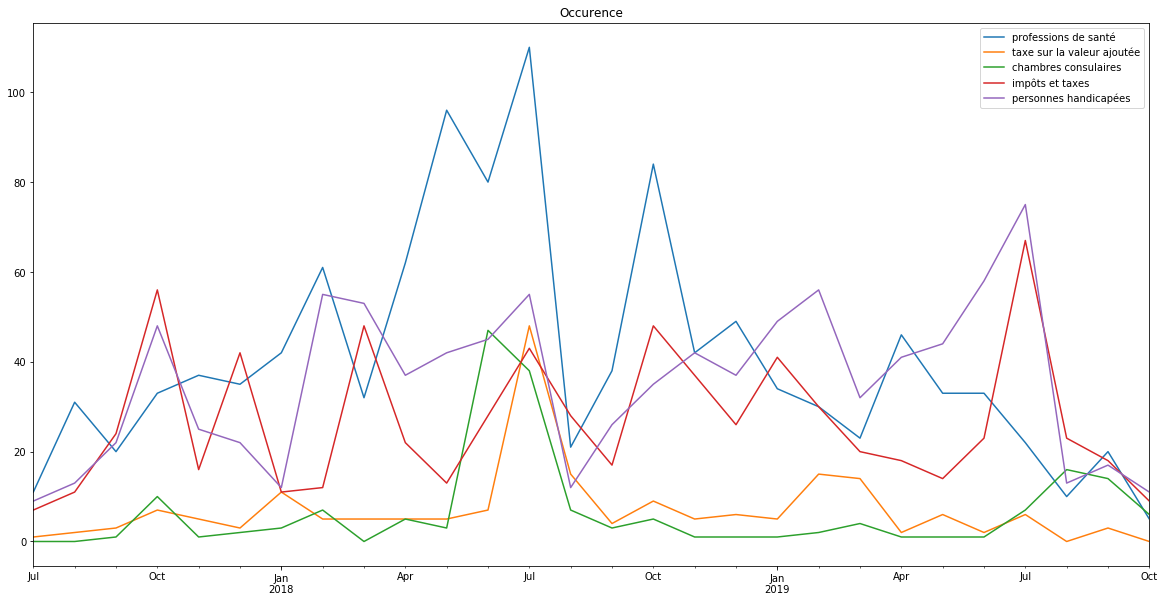

In [43]:
themesEcartAbs = [theme for theme in ecarts.sort_values(ascending = False,by='ecartAbs').head(k)['theme']]
df2.plot(figsize = (20,10),title = 'Occurence',y = themesEcartAbs)

On voit que ce résultat est biaisé par le fait que les thèmes les plus abordés sont suscpetibles d'avoir une grande valeur EcartAbs sans qu'ils représentent nécessairement un pic pertinent. On va donc tenter de pondérer par la moyenne.

### EcartRel
Le maximum de la valeur absolue de la différence avec la moyenne, divisé par la moyenne

On etudie des k plus grands ecartsRel:

In [37]:
ecarts.sort_values(ascending = False,by='ecartAbs').head(k)

,ecartAbs,ecartRel,ecartSqrt,moyenne,theme,vecteur
161,69.285714,1.701754,10.858511,40.714286,professions de santé,"[11, 31, 20, 33, 37, 35, 42, 61, 32, 62, 96, 8..."
172,40.892857,5.753769,15.339102,7.107143,taxe sur la valeur ajoutée,"[1, 2, 3, 7, 5, 3, 11, 5, 5, 5, 5, 7, 48, 15, ..."
18,40.321429,6.037433,15.602498,6.678571,chambres consulaires,"[0, 0, 1, 10, 1, 2, 3, 7, 0, 5, 3, 47, 38, 7, ..."
17,40.142857,1.494681,7.746016,26.857143,impôts et taxes,"[7, 11, 24, 56, 16, 42, 11, 12, 48, 22, 13, 28..."
133,39.785714,1.129817,6.704520,35.214286,personnes handicapées,"[9, 13, 22, 48, 25, 22, 12, 55, 53, 37, 42, 45..."


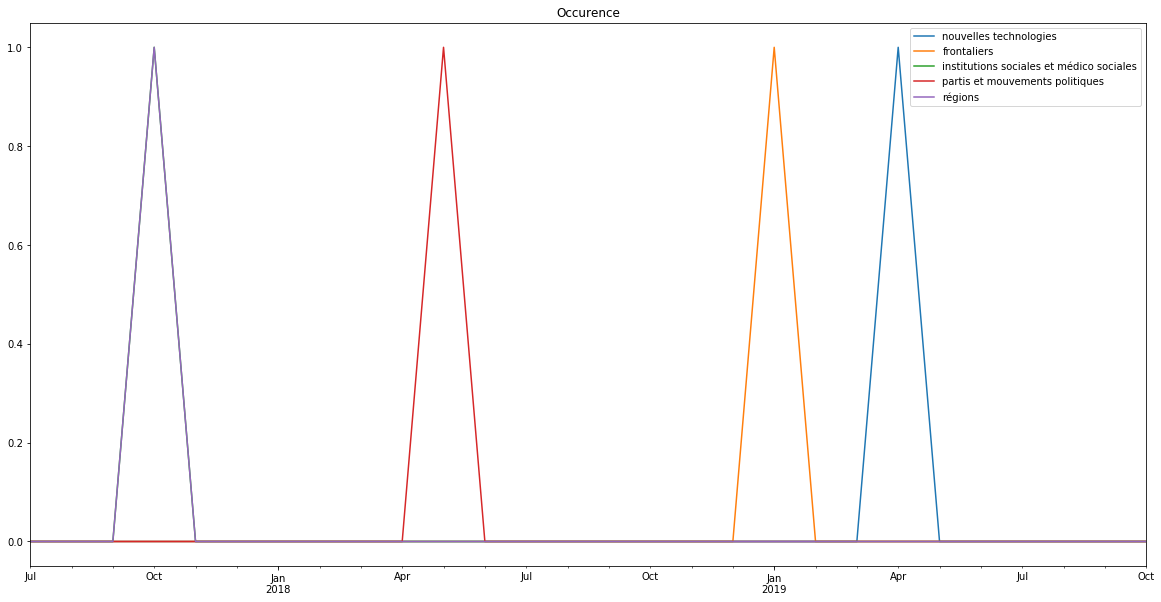

In [38]:
themesEcartRel = [theme for theme in ecarts.sort_values(ascending = False,by='ecartRel').head(k)['theme']]
df2.plot(figsize = (20,10),title = 'Occurence',y = themesEcartRel)

On remarque que ce ne sont que les themes qui ont été abordés une seule fois qui sont sélectionnés, ce qui ne nous intéresse pas. Essayons autre chose :/

### ecartSqrt

Pour avoir un entre-deux des précédents, on pondère ecartAbs par la racine de la moyenne. On etudie des k plus grands ecartSqrt:

In [40]:
ecarts.sort_values(ascending = False,by='ecartSqrt').head(k)

,ecartAbs,ecartRel,ecartSqrt,moyenne,theme,vecteur
18,40.321429,6.037433,15.602498,6.678571,chambres consulaires,"[0, 0, 1, 10, 1, 2, 3, 7, 0, 5, 3, 47, 38, 7, ..."
172,40.892857,5.753769,15.339102,7.107143,taxe sur la valeur ajoutée,"[1, 2, 3, 7, 5, 3, 11, 5, 5, 5, 5, 7, 48, 15, ..."
1,26.428571,7.400000,13.984686,3.571429,ministères et secrétariats d'État,"[0, 0, 3, 0, 0, 0, 1, 1, 0, 6, 0, 1, 1, 0, 1, ..."
41,34.071429,4.917526,12.944000,6.928571,eau et assainissement,"[0, 3, 5, 12, 13, 18, 5, 3, 7, 7, 6, 6, 8, 3, ..."
205,25.571429,5.774194,12.151312,4.428571,élections et référendums,"[2, 1, 2, 4, 2, 3, 6, 1, 3, 2, 4, 6, 7, 1, 0, ..."


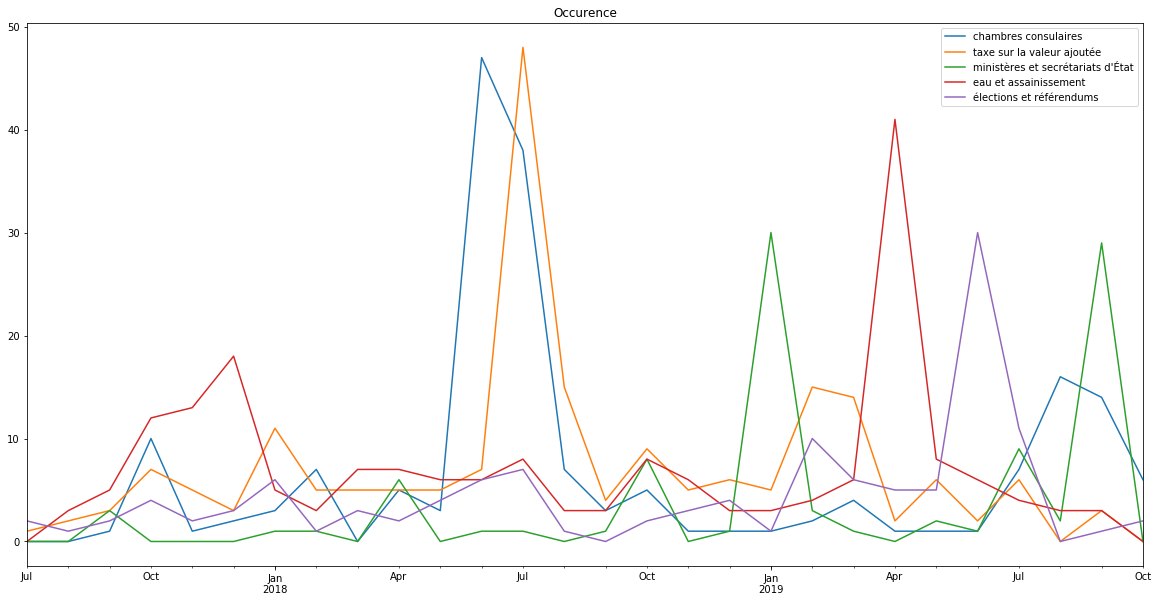

In [39]:
themesEcartSqrt = [theme for theme in ecarts.sort_values(ascending = False,by='ecartSqrt').head(k)['theme']]
df2.plot(figsize = (20,10),title = 'Occurence',y = themesEcartSqrt)

On remarque pour chaque courbes des pics prononcés à des mois précis, en nous pouvons donc en déduire que ce mode de détection semble assez pertinent. 